In [1]:
import pandas as pd
import numpy as np
import investpy
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import scipy.optimize as optimize
import datetime as dt
import yfinance as yf
yf.pdr_override()
import time
import random


In [2]:
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from scipy.stats import norm

# Get the data

In [3]:
file = pd.read_csv('nasdaq.csv')
file

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$150.82,5.390,3.706%,2.614818e+12,United States,1980.0,106882922,Technology,Computer Manufacturing
1,ADBE,Adobe Inc. Common Stock,$392.23,8.310,2.165%,1.795629e+11,United States,1986.0,4006918,Technology,Computer Software: Prepackaged Software
2,ADI,Analog Devices Inc. Common Stock,$179.30,2.710,1.535%,9.079211e+10,United States,NaN,4201586,Technology,Semiconductors
3,ADSK,Autodesk Inc. Common Stock,$228.22,6.030,2.714%,4.924246e+10,United States,NaN,1823242,Technology,Computer Software: Prepackaged Software
4,AMAT,Applied Materials Inc. Common Stock,$124.26,5.250,4.411%,1.047609e+11,United States,1972.0,11171502,Technology,Semiconductors
5,AMD,Advanced Micro Devices Inc. Common Stock,$88.31,3.670,4.336%,1.437126e+11,United States,NaN,97272451,Technology,Semiconductors
6,ANSS,ANSYS Inc. Common Stock,$282.50,8.110,2.956%,2.460921e+10,United States,1996.0,559976,Technology,Computer Software: Prepackaged Software
7,AVGO,Broadcom Inc. Common Stock,$605.77,3.020,0.501%,2.531429e+11,United States,2009.0,2412430,Technology,Semiconductors
8,AZPN,Aspen Technology Inc. Common Stock,$204.14,-2.680,-1.296%,1.322241e+10,United States,NaN,299855,Technology,EDP Services
9,BSY,Bentley Systems Incorporated Class B Common Stock,$42.27,1.680,4.139%,1.219036e+10,United States,2020.0,1313708,Technology,Retail: Computer Software & Peripheral Equipment


In [4]:
tickers = file['Symbol'].tolist()

In [5]:
tickers

['AAPL',
 'ADBE',
 'ADI',
 'ADSK',
 'AMAT',
 'AMD',
 'ANSS',
 'AVGO',
 'AZPN',
 'BSY',
 'CDNS',
 'COIN',
 'CRWD',
 'DDOG',
 'DOCU',
 'ENPH',
 'ENTG',
 'FSLR',
 'FTNT',
 'GFS',
 'GOOG',
 'GOOGL',
 'INTU',
 'JKHY',
 'KLAC',
 'LRCX',
 'LSCC',
 'MCHP',
 'MDB',
 'META',
 'MPWR',
 'MRVL',
 'MSFT',
 'MTCH',
 'MU',
 'NTAP',
 'NVDA',
 'OKTA',
 'ON',
 'PANW',
 'PCTY',
 'PTC',
 'QCOM',
 'SNPS',
 'SPLK',
 'SSNC',
 'SWKS',
 'TTD',
 'TTWO',
 'TXN',
 'VRSN',
 'WDAY',
 'WDC',
 'ZBRA',
 'ZI',
 'ZM',
 'ZS']

In [6]:
start = dt.datetime(2018, 1, 1)
data_stocks=pdr.get_data_yahoo(tickers,start)

[*********************100%***********************]  57 of 57 completed


In [7]:
close=data_stocks[['Close']]

In [8]:
close

Close                                                  \
                  AAPL        ADBE         ADI        ADSK        AMAT   
Date                                                                     
2018-01-02   43.064999  177.699997   90.279999  107.120003   53.040001   
2018-01-03   43.057499  181.039993   91.400002  109.379997   53.980000   
2018-01-04   43.257500  183.220001   91.300003  112.070000   54.290001   
2018-01-05   43.750000  185.339996   91.669998  110.839996   54.599998   
2018-01-08   43.587502  185.039993   91.830002  111.419998   55.919998   
...                ...         ...         ...         ...         ...   
2023-01-30  143.000000  363.420013  168.929993  209.119995  108.199997   
2023-01-31  144.289993  370.339996  171.470001  215.160004  111.489998   
2023-02-01  145.429993  383.920013  176.589996  222.190002  119.010002   
2023-02-02  150.820007  392.230011  179.300003  228.220001  124.260002   
2023-02-03  154.500000  379.329987  178.820007  223.660004  119.980003   

                                                                      ...  \
                  AMD        ANSS        AVGO        AZPN        BSY  ...   
Date                                                                  ...   
2018-01-02  10.980000  148.550003  267.010010   66.169998        NaN  ...   
2018-01-03  11.550000  151.419998  269.929993   66.169998        NaN  ...   
2018-01-04  12.120000  151.820007  270.019989   70.019997        NaN  ...   
2018-01-05  11.880000  152.449997  271.619995   70.779999        NaN  ...   
2018-01-08  12.280000  153.710007  272.269989   73.110001        NaN  ...   
...               ...         ...         ...         ...        ...  ...   
2023-01-30  72.449997  261.559998  581.450012  195.710007  38.799999  ...   
2023-01-31  75.150002  266.359985  585.010010  198.750000  39.049999  ...   
2023-02-01  84.639999  274.390015  602.750000  206.820007  40.590000  ...   
2023-02-02  88.309998  282.500000  605.770020  204.139999  42.270000  ...   
2023-02-03  86.089996  275.230011  597.619995  200.729996  41.380001  ...   

                                                                       \
                  TTD        TTWO         TXN        VRSN        WDAY   
Date                                                                    
2018-01-02   4.641000  112.879997  105.570000  109.470001  103.400002   
2018-01-03   4.791000  113.879997  108.430000  110.900002  105.169998   
2018-01-04   4.765000  114.019997  108.290001  111.470001  109.250000   
2018-01-05   4.835000  116.910004  109.120003  113.000000  109.320000   
2018-01-08   4.787000  117.370003  109.639999  114.309998  109.940002   
...               ...         ...         ...         ...         ...   
2023-01-30  49.220001  112.660004  173.130005  216.190002  176.479996   
2023-01-31  50.700001  113.230003  177.210007  218.050003  181.429993   
2023-02-01  52.310001  112.250000  182.100006  220.729996  185.330002   
2023-02-02  57.009998  114.720001  184.720001  222.369995  190.979996   
2023-02-03  53.099998  109.279999  182.289993  217.729996  185.850006   

                                                                     
                  WDC        ZBRA         ZI         ZM          ZS  
Date                                                                 
2018-01-02  81.379997  103.709999        NaN        NaN         NaN  
2018-01-03  82.669998  105.769997        NaN        NaN         NaN  
2018-01-04  82.169998  107.860001        NaN        NaN         NaN  
2018-01-05  82.690002  109.540001        NaN        NaN         NaN  
2018-01-08  81.440002  110.629997        NaN        NaN         NaN  
...               ...         ...        ...        ...         ...  
2023-01-30  44.240002  309.029999  27.389999  73.500000  122.599998  
2023-01-31  43.950001  316.179993  28.230000  75.000000  124.160004  
2023-02-01  43.320000  328.630005  28.395000  78.110001  131.520004  
2023-02-02  44.580002  344.700012  30.

In [9]:
close.columns=close.columns.droplevel() #droplevel get rid of close 

In [10]:
close

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,BSY,...,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZI,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.064999,177.699997,90.279999,107.120003,53.040001,10.980000,148.550003,267.010010,66.169998,NaN,...,4.641000,112.879997,105.570000,109.470001,103.400002,81.379997,103.709999,NaN,NaN,NaN
2018-01-03,43.057499,181.039993,91.400002,109.379997,53.980000,11.550000,151.419998,269.929993,66.169998,NaN,...,4.791000,113.879997,108.430000,110.900002,105.169998,82.669998,105.769997,NaN,NaN,NaN
2018-01-04,43.257500,183.220001,91.300003,112.070000,54.290001,12.120000,151.820007,270.019989,70.019997,NaN,...,4.765000,114.019997,108.290001,111.470001,109.250000,82.169998,107.860001,NaN,NaN,NaN
2018-01-05,43.750000,185.339996,91.669998,110.839996,54.599998,11.880000,152.449997,271.619995,70.779999,NaN,...,4.835000,116.910004,109.120003,113.000000,109.320000,82.690002,109.540001,NaN,NaN,NaN
2018-01-08,43.587502,185.039993,91.830002,111.419998,55.919998,12.280000,153.710007,272.269989,73.110001,NaN,...,4.787000,117.370003,109.639999,114.309998,109.940002,81.440002,110.629997,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,143.000000,363.420013,168.929993,209.119995,108.199997,72.449997,261.559998,581.450012,195.710007,38.799999,...,49.220001,112.660004,173.130005,216.190002,176.479996,44.240002,309.029999,27.389999,73.500000,122.599998
2023-01-31,144.289993,370.339996,171.470001,215.160004,111.489998,75.150002,266.359985,585.010010,198.750000,39.049999,...,50.700001,113.230003,177.210007,218.050003,181.429993,43.950001,316.179993,28.230000,75.000000,124.160004
2023-02-01,145.429993,383.920013,176.589996,222.190002,119.010002,84.639999,274.390015,602.750000,206.820007,40.590000,...,52.310001,112.250000,182.100006,220.729996,185.330002,43.320000,328.630005,28.395000,78.110001,131.520004


## Cleaning Data

In [11]:
nulls_percent_df = pd.DataFrame(close.isna().sum()/len(close)*100).reset_index()
nulls_percent_df
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,AAPL,0.000000
1,ADBE,0.000000
2,ADI,0.000000
3,ADSK,0.000000
4,AMAT,0.000000
5,AMD,0.000000
6,ANSS,0.000000
7,AVGO,0.000000
8,AZPN,0.000000
9,BSY,53.510140


In [12]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
9,BSY,53.510140
11,COIN,64.352574
12,CRWD,28.237129
13,DDOG,33.619345
14,DOCU,6.240250
19,GFS,75.117005
54,ZI,47.503900
55,ZM,25.351014
56,ZS,3.978159


In [13]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>5]
columns_above_threshold['column_name']

9      BSY
11    COIN
12    CRWD
13    DDOG
14    DOCU
19     GFS
54      ZI
55      ZM
Name: column_name, dtype: object

In [14]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['BSY', 'COIN', 'CRWD', 'DDOG', 'DOCU', 'GFS', 'ZI', 'ZM']


In [15]:
close = close.drop(drop_columns_list,axis=1)

In [16]:
close

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,43.064999,177.699997,90.279999,107.120003,53.040001,10.980000,148.550003,267.010010,66.169998,42.049999,...,40.610001,98.430000,4.641000,112.879997,105.570000,109.470001,103.400002,81.379997,103.709999,NaN
2018-01-03,43.057499,181.039993,91.400002,109.379997,53.980000,11.550000,151.419998,269.929993,66.169998,42.930000,...,41.049999,99.930000,4.791000,113.879997,108.430000,110.900002,105.169998,82.669998,105.769997,NaN
2018-01-04,43.257500,183.220001,91.300003,112.070000,54.290001,12.120000,151.820007,270.019989,70.019997,43.580002,...,41.459999,100.769997,4.765000,114.019997,108.290001,111.470001,109.250000,82.169998,107.860001,NaN
2018-01-05,43.750000,185.339996,91.669998,110.839996,54.599998,11.880000,152.449997,271.619995,70.779999,43.990002,...,41.849998,101.230003,4.835000,116.910004,109.120003,113.000000,109.320000,82.690002,109.540001,NaN
2018-01-08,43.587502,185.039993,91.830002,111.419998,55.919998,12.280000,153.710007,272.269989,73.110001,44.919998,...,42.209999,101.250000,4.787000,117.370003,109.639999,114.309998,109.940002,81.440002,110.629997,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,143.000000,363.420013,168.929993,209.119995,108.199997,72.449997,261.559998,581.450012,195.710007,180.740005,...,58.919998,108.580002,49.220001,112.660004,173.130005,216.190002,176.479996,44.240002,309.029999,122.599998
2023-01-31,144.289993,370.339996,171.470001,215.160004,111.489998,75.150002,266.359985,585.010010,198.750000,182.830002,...,60.349998,109.669998,50.700001,113.230003,177.210007,218.050003,181.429993,43.950001,316.179993,124.160004
2023-02-01,145.429993,383.920013,176.589996,222.190002,119.010002,84.639999,274.390015,602.750000,206.820007,188.889999,...,61.599998,113.120003,52.310001,112.250000,182.100006,220.729996,185.330002,43.320000,328.630005,131.520004


## Analysis

### Generating Rnadom Uncorrelated Portfolios

In [17]:
returns_stocks=np.log(close).diff()
returns_stocks = returns_stocks.dropna()
returns_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,-0.015397,-0.015054,-0.006928,-0.010664,-0.015941,-0.003493,-0.008150,-0.039699,-0.003593,-0.009373,...,-0.009361,-0.011820,-0.040707,-0.026348,-0.019374,-0.013593,-0.027949,-0.031394,-0.024363,-0.167881
2018-03-20,-0.000342,0.033504,-0.008485,0.002157,0.012401,-0.028396,0.003208,-0.010630,0.004211,-0.007088,...,0.011071,-0.002381,0.024868,0.007056,0.014725,0.007858,0.011183,0.004932,0.017362,0.085158
2018-03-21,-0.022915,-0.012703,0.000970,0.006959,0.025833,0.013411,0.005544,0.014907,-0.003839,0.010222,...,0.008694,-0.005516,-0.008634,-0.004858,-0.007520,-0.004804,0.002626,-0.008038,0.007838,0.022780
2018-03-22,-0.014231,-0.028301,-0.024655,-0.030945,-0.030402,-0.031577,-0.024331,-0.009927,-0.020051,-0.025351,...,-0.013833,-0.030230,-0.035850,-0.022597,-0.044611,-0.015774,-0.016702,-0.019738,-0.036703,-0.041050
2018-03-23,-0.023429,-0.025257,-0.031870,-0.026136,-0.062641,-0.026000,-0.029176,-0.004485,-0.019944,-0.027384,...,-0.016545,-0.037072,-0.021881,-0.026623,-0.024750,-0.026186,-0.027662,-0.087959,-0.014128,-0.013500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,-0.020282,-0.019861,-0.011185,-0.008381,-0.038972,-0.039911,-0.019348,-0.016274,0.025670,-0.023458,...,-0.012314,-0.023483,-0.053982,-0.014277,-0.012114,-0.010720,-0.006664,-0.016366,-0.025779,-0.039346
2023-01-31,0.008980,0.018862,0.014924,0.028474,0.029954,0.036590,0.018185,0.006104,0.015414,0.011497,...,0.023980,0.009989,0.029626,0.005047,0.023293,0.008567,0.027662,-0.006577,0.022873,0.012644
2023-02-01,0.007870,0.036013,0.029422,0.032151,0.065273,0.118921,0.029702,0.029874,0.039801,0.032608,...,0.020501,0.030973,0.031262,-0.008693,0.027221,0.012216,0.021268,-0.014438,0.038621,0.057588


In [18]:
returns_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-19,-0.015397,-0.015054,-0.006928,-0.010664,-0.015941,-0.003493,-0.008150,-0.039699,-0.003593,-0.009373,...,-0.009361,-0.011820,-0.040707,-0.026348,-0.019374,-0.013593,-0.027949,-0.031394,-0.024363,-0.167881
2018-03-20,-0.000342,0.033504,-0.008485,0.002157,0.012401,-0.028396,0.003208,-0.010630,0.004211,-0.007088,...,0.011071,-0.002381,0.024868,0.007056,0.014725,0.007858,0.011183,0.004932,0.017362,0.085158
2018-03-21,-0.022915,-0.012703,0.000970,0.006959,0.025833,0.013411,0.005544,0.014907,-0.003839,0.010222,...,0.008694,-0.005516,-0.008634,-0.004858,-0.007520,-0.004804,0.002626,-0.008038,0.007838,0.022780
2018-03-22,-0.014231,-0.028301,-0.024655,-0.030945,-0.030402,-0.031577,-0.024331,-0.009927,-0.020051,-0.025351,...,-0.013833,-0.030230,-0.035850,-0.022597,-0.044611,-0.015774,-0.016702,-0.019738,-0.036703,-0.041050
2018-03-23,-0.023429,-0.025257,-0.031870,-0.026136,-0.062641,-0.026000,-0.029176,-0.004485,-0.019944,-0.027384,...,-0.016545,-0.037072,-0.021881,-0.026623,-0.024750,-0.026186,-0.027662,-0.087959,-0.014128,-0.013500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,-0.020282,-0.019861,-0.011185,-0.008381,-0.038972,-0.039911,-0.019348,-0.016274,0.025670,-0.023458,...,-0.012314,-0.023483,-0.053982,-0.014277,-0.012114,-0.010720,-0.006664,-0.016366,-0.025779,-0.039346
2023-01-31,0.008980,0.018862,0.014924,0.028474,0.029954,0.036590,0.018185,0.006104,0.015414,0.011497,...,0.023980,0.009989,0.029626,0.005047,0.023293,0.008567,0.027662,-0.006577,0.022873,0.012644
2023-02-01,0.007870,0.036013,0.029422,0.032151,0.065273,0.118921,0.029702,0.029874,0.039801,0.032608,...,0.020501,0.030973,0.031262,-0.008693,0.027221,0.012216,0.021268,-0.014438,0.038621,0.057588


In [19]:
corr_stocks=returns_stocks.corr(method='pearson')

In [20]:
corr_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
AAPL,1.000000,0.683059,0.638699,0.619060,0.625259,0.567590,0.691239,0.647533,0.460832,0.664901,...,0.560142,0.702337,0.473629,0.443943,0.662466,0.612755,0.542987,0.469339,0.578889,0.403033
ADBE,0.683059,1.000000,0.638267,0.728954,0.608172,0.572038,0.779624,0.597319,0.471763,0.739539,...,0.597504,0.603936,0.558814,0.499096,0.640398,0.676623,0.689897,0.421581,0.578425,0.524542
ADI,0.638699,0.638267,1.000000,0.637579,0.793019,0.601242,0.702864,0.766021,0.447369,0.683773,...,0.627197,0.793238,0.484064,0.391261,0.861201,0.594249,0.539826,0.619481,0.587039,0.358205
ADSK,0.619060,0.728954,0.637579,1.000000,0.619493,0.570507,0.767623,0.614068,0.522278,0.691867,...,0.618662,0.615437,0.565143,0.440640,0.630694,0.601686,0.649297,0.498490,0.593966,0.485425
AMAT,0.625259,0.608172,0.793019,0.619493,1.000000,0.609171,0.670443,0.730908,0.444791,0.666317,...,0.552320,0.758206,0.482313,0.393241,0.791501,0.555180,0.520462,0.658481,0.590806,0.353250
AMD,0.567590,0.572038,0.601242,0.570507,0.609171,1.000000,0.609325,0.561991,0.433264,0.595495,...,0.469240,0.576471,0.509629,0.403330,0.612054,0.527759,0.503596,0.448202,0.515814,0.441256
ANSS,0.691239,0.779624,0.702864,0.767623,0.670443,0.609325,1.000000,0.655425,0.525247,0.794075,...,0.617731,0.680438,0.566081,0.484213,0.707244,0.705229,0.667022,0.461434,0.631404,0.531308
AVGO,0.647533,0.597319,0.766021,0.614068,0.730908,0.561991,0.655425,1.000000,0.404765,0.657393,...,0.592184,0.757599,0.462630,0.379655,0.743476,0.551888,0.516711,0.587139,0.547914,0.350612
AZPN,0.460832,0.471763,0.447369,0.522278,0.444791,0.433264,0.525247,0.404765,1.000000,0.490009,...,0.480959,0.420700,0.400032,0.336565,0.454976,0.488713,0.465910,0.399152,0.437807,0.339885
CDNS,0.664901,0.739539,0.683773,0.691867,0.666317,0.595495,0.794075,0.657393,0.490009,1.000000,...,0.579490,0.663152,0.547493,0.464077,0.690528,0.675729,0.625565,0.469909,0.578214,0.512699


In [21]:
upper_stocks=corr_stocks.where(np.triu(np.ones(corr_stocks.shape),k=1).astype(np.bool8))

/var/folders/_7/r8_t39mn1y9_vrqfwvk06l_w0000gn/T/ipykernel_3058/862718547.py:1: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  upper_stocks=corr_stocks.where(np.triu(np.ones(corr_stocks.shape),k=1).astype(np.bool8))


In [22]:
upper_stocks

,AAPL,ADBE,ADI,ADSK,AMAT,AMD,ANSS,AVGO,AZPN,CDNS,...,SSNC,SWKS,TTD,TTWO,TXN,VRSN,WDAY,WDC,ZBRA,ZS
AAPL,NaN,0.683059,0.638699,0.619060,0.625259,0.567590,0.691239,0.647533,0.460832,0.664901,...,0.560142,0.702337,0.473629,0.443943,0.662466,0.612755,0.542987,0.469339,0.578889,0.403033
ADBE,NaN,NaN,0.638267,0.728954,0.608172,0.572038,0.779624,0.597319,0.471763,0.739539,...,0.597504,0.603936,0.558814,0.499096,0.640398,0.676623,0.689897,0.421581,0.578425,0.524542
ADI,NaN,NaN,NaN,0.637579,0.793019,0.601242,0.702864,0.766021,0.447369,0.683773,...,0.627197,0.793238,0.484064,0.391261,0.861201,0.594249,0.539826,0.619481,0.587039,0.358205
ADSK,NaN,NaN,NaN,NaN,0.619493,0.570507,0.767623,0.614068,0.522278,0.691867,...,0.618662,0.615437,0.565143,0.440640,0.630694,0.601686,0.649297,0.498490,0.593966,0.485425
AMAT,NaN,NaN,NaN,NaN,NaN,0.609171,0.670443,0.730908,0.444791,0.666317,...,0.552320,0.758206,0.482313,0.393241,0.791501,0.555180,0.520462,0.658481,0.590806,0.353250
AMD,NaN,NaN,NaN,NaN,NaN,NaN,0.609325,0.561991,0.433264,0.595495,...,0.469240,0.576471,0.509629,0.403330,0.612054,0.527759,0.503596,0.448202,0.515814,0.441256
ANSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655425,0.525247,0.794075,...,0.617731,0.680438,0.566081,0.484213,0.707244,0.705229,0.667022,0.461434,0.631404,0.531308
AVGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404765,0.657393,...,0.592184,0.757599,0.462630,0.379655,0.743476,0.551888,0.516711,0.587139,0.547914,0.350612
AZPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490009,...,0.480959,0.420700,0.400032,0.336565,0.454976,0.488713,0.465910,0.399152,0.437807,0.339885
CDNS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.579490,0.663152,0.547493,0.464077,0.690528,0.675729,0.625565,0.469909,0.578214,0.512699


In [23]:
upper_stocks=upper_stocks.unstack().dropna()

In [24]:
upper_stocks=upper_stocks.sort_values(ascending=False)

In [25]:
upper_stocks

GOOGL  GOOG    0.994741
LRCX   AMAT    0.920051
SNPS   CDNS    0.883933
LRCX   KLAC    0.882959
KLAC   AMAT    0.880686
                 ...   
ZS     JKHY    0.240141
       WDC     0.237513
TTWO   FSLR    0.234657
JKHY   FSLR    0.188897
       ENPH    0.173254
Length: 1176, dtype: float64

In [26]:
up_stocks = upper_stocks[:100]
up_stocks = [item for t in up_stocks.index for item in t]
down_stocks = upper_stocks[-100:]
down_stocks = [item for t in down_stocks.index for item in t]

In [27]:
up_stocks

['GOOGL',
 'GOOG',
 'LRCX',
 'AMAT',
 'SNPS',
 'CDNS',
 'LRCX',
 'KLAC',
 'KLAC',
 'AMAT',
 'TXN',
 'ADI',
 'MCHP',
 'ADI',
 'TXN',
 'MCHP',
 'ON',
 'MCHP',
 'SNPS',
 'ANSS',
 'MCHP',
 'AMAT',
 'MSFT',
 'GOOGL',
 'MSFT',
 'ADBE',
 'MSFT',
 'GOOG',
 'ON',
 'ADI',
 'MCHP',
 'LRCX',
 'TXN',
 'SWKS',
 'SNPS',
 'INTU',
 'CDNS',
 'ANSS',
 'SWKS',
 'MCHP',
 'SWKS',
 'ADI',
 'MCHP',
 'KLAC',
 'AMAT',
 'ADI',
 'TXN',
 'AMAT',
 'MPWR',
 'ADI',
 'ENTG',
 'AMAT',
 'MSFT',
 'INTU',
 'MSFT',
 'ANSS',
 'INTU',
 'ANSS',
 'MPWR',
 'MCHP',
 'KLAC',
 'ADI',
 'LRCX',
 'ADI',
 'TXN',
 'KLAC',
 'ANSS',
 'ADBE',
 'KLAC',
 'ENTG',
 'MPWR',
 'KLAC',
 'LRCX',
 'ENTG',
 'MU',
 'LRCX',
 'MU',
 'AMAT',
 'TXN',
 'MPWR',
 'TXN',
 'LRCX',
 'MSFT',
 'AAPL',
 'ANSS',
 'ADSK',
 'MPWR',
 'LRCX',
 'MPWR',
 'AMAT',
 'AVGO',
 'ADI',
 'SNPS',
 'MSFT',
 'SWKS',
 'MPWR',
 'WDC',
 'MU',
 'NVDA',
 'MPWR',
 'SWKS',
 'AMAT',
 'SWKS',
 'AVGO',
 'MRVL',
 'MPWR',
 'SNPS',
 'ADBE',
 'INTU',
 'ADBE',
 'MU',
 'MCHP',
 'SWKS',
 'LRCX',
 

In [28]:
down_stocks

['ZBRA',
 'TTWO',
 'MU',
 'ENPH',
 'MDB',
 'ENPH',
 'WDAY',
 'JKHY',
 'TTWO',
 'PCTY',
 'SPLK',
 'ENPH',
 'ZS',
 'TXN',
 'ZS',
 'TTWO',
 'TTWO',
 'ENTG',
 'MU',
 'MDB',
 'TTWO',
 'PTC',
 'TXN',
 'ENPH',
 'TTWO',
 'FTNT',
 'ON',
 'OKTA',
 'SSNC',
 'FSLR',
 'ZS',
 'MCHP',
 'ZBRA',
 'FSLR',
 'QCOM',
 'OKTA',
 'FTNT',
 'ENPH',
 'INTU',
 'FSLR',
 'ZS',
 'ADI',
 'NTAP',
 'META',
 'QCOM',
 'AZPN',
 'QCOM',
 'JKHY',
 'JKHY',
 'AMD',
 'ENPH',
 'AMD',
 'ZS',
 'AMAT',
 'ZBRA',
 'ENPH',
 'WDC',
 'PANW',
 'TTWO',
 'MCHP',
 'FSLR',
 'AAPL',
 'ZS',
 'AVGO',
 'ZS',
 'LRCX',
 'MTCH',
 'AZPN',
 'WDC',
 'FSLR',
 'QCOM',
 'FSLR',
 'FSLR',
 'AMD',
 'OKTA',
 'ENPH',
 'TTWO',
 'PANW',
 'GOOGL',
 'FSLR',
 'ZS',
 'SSNC',
 'ZS',
 'AZPN',
 'TTWO',
 'JKHY',
 'GOOG',
 'FSLR',
 'TTWO',
 'LSCC',
 'LSCC',
 'JKHY',
 'ZS',
 'QCOM',
 'TTD',
 'NTAP',
 'TTWO',
 'AZPN',
 'GOOGL',
 'ENPH',
 'OKTA',
 'MU',
 'QCOM',
 'ENPH',
 'GOOG',
 'ENPH',
 'TTWO',
 'MU',
 'ZS',
 'MU',
 'PANW',
 'JKHY',
 'VRSN',
 'ENPH',
 'MU',
 'JKHY',
 '

In [29]:
cagr=pd.DataFrame(index=close.index)

In [30]:
rdom_stocks=[]

In [31]:
for i in range(5): # cadas iteración va a ser una cartera
    randomstocks=list(set(random.sample(up_stocks,k=2)+random.sample(down_stocks,k=2)))
    while len(randomstocks)<4:# mientras la cartera sea menor a 6 acciones
         randomstocks=list(set(random.sample(up_stocks,k=2)+random.sample(down_stocks,k=2)))
    rdom_stocks.append(randomstocks)
    data=yf.download(randomstocks,'2018-01-01',progress=False)['Close']
    
    weights = [0.1]*len(randomstocks)
    
    returns = data.pct_change()
    returns = returns.dot(weights)
    cagr[i]=(1+returns).cumprod().fillna(1)
    print('Random',i,)

Random 0
Random 1
Random 2
Random 3
Random 4


In [32]:
cagr.sum()

0    2032.415187
1    1490.137229
2    2491.850308
3    1487.217171
4    1779.951965
dtype: float64

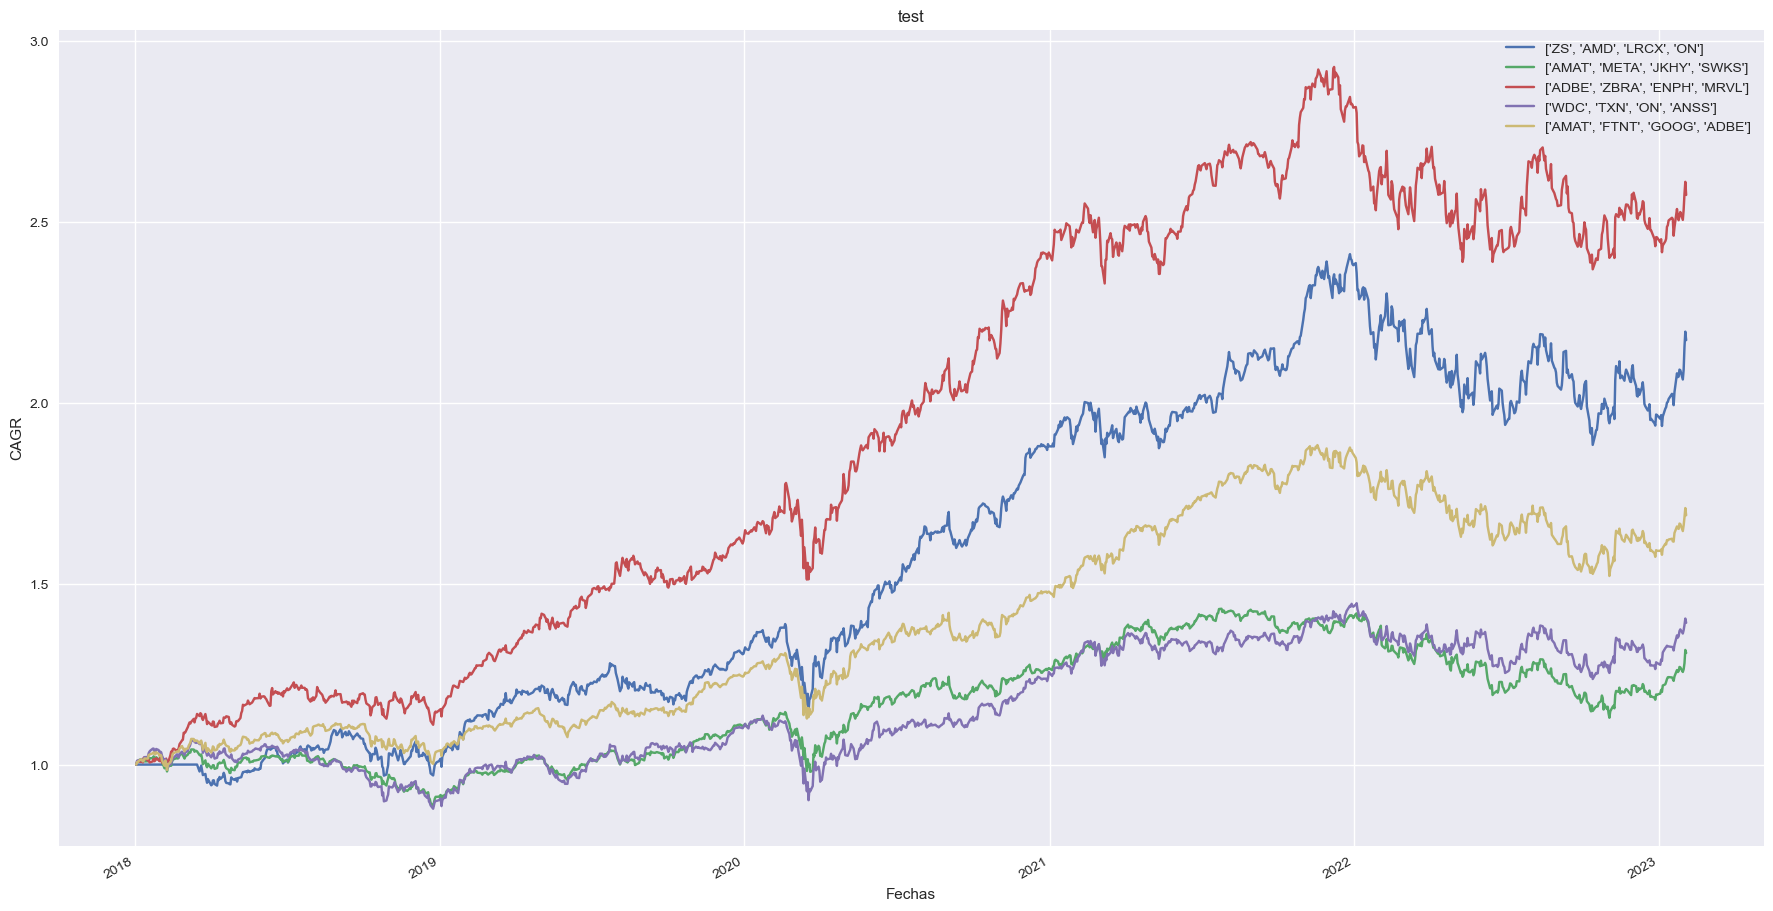

In [33]:
plt.style.use('seaborn')
cagr.plot(figsize=(22,12),title='test',ylabel="CAGR",xlabel="Fechas")
plt.legend(rdom_stocks)
plt.show()

### Markowitz

## Portfolio 1 

In [34]:
symbols=['ADI','MRVL','FSLR','MDB']
#symbols=['AAPL','MSFT','SPY','GLD']

#list_assets=['RCL','CPT','CLX','CPB','RF','USB']

In [35]:
assets=pdr.get_data_yahoo(symbols,start)

[*********************100%***********************]  4 of 4 completed


In [36]:
assets=pd.DataFrame(assets)[['Close']]

In [37]:
assets.columns=assets.columns.droplevel()

In [38]:
assets

,ADI,FSLR,MDB,MRVL
Date,,,,
2018-01-02,90.279999,70.430000,29.250000,22.200001
2018-01-03,91.400002,69.800003,29.150000,22.889999
2018-01-04,91.300003,69.139999,29.049999,23.410000
2018-01-05,91.669998,69.169998,29.049999,23.000000
2018-01-08,91.830002,69.620003,28.809999,23.170000
...,...,...,...,...
2023-01-30,168.929993,170.779999,210.410004,41.990002
2023-01-31,171.470001,177.600006,214.210007,43.150002
2023-02-01,176.589996,180.149994,228.169998,46.119999


In [39]:
assets.corr()

,ADI,FSLR,MDB,MRVL
ADI,1.000000,0.702760,0.879438,0.910211
FSLR,0.702760,1.000000,0.437670,0.523765
MDB,0.879438,0.437670,1.000000,0.933071
MRVL,0.910211,0.523765,0.933071,1.000000


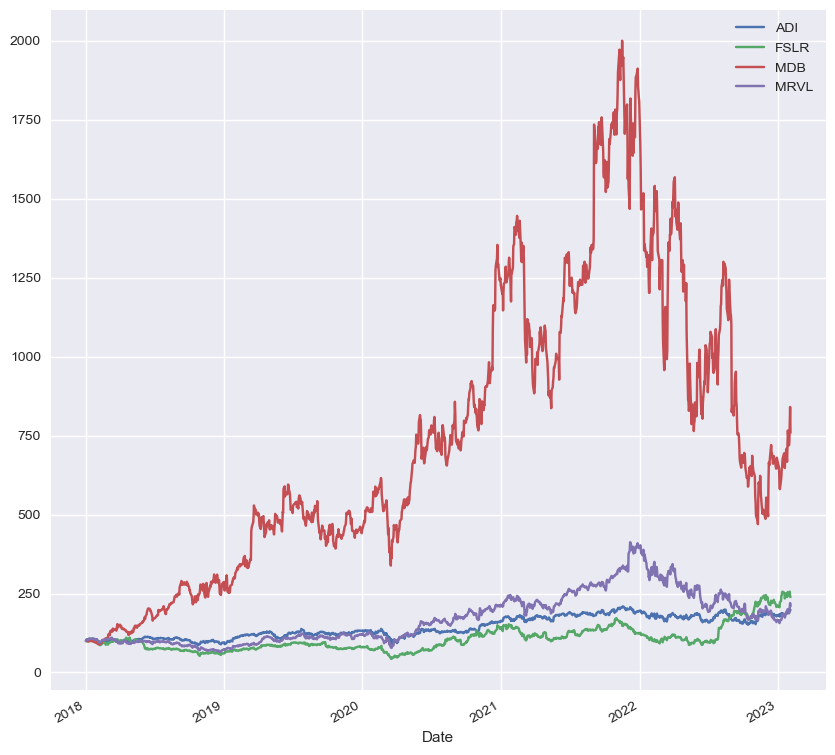

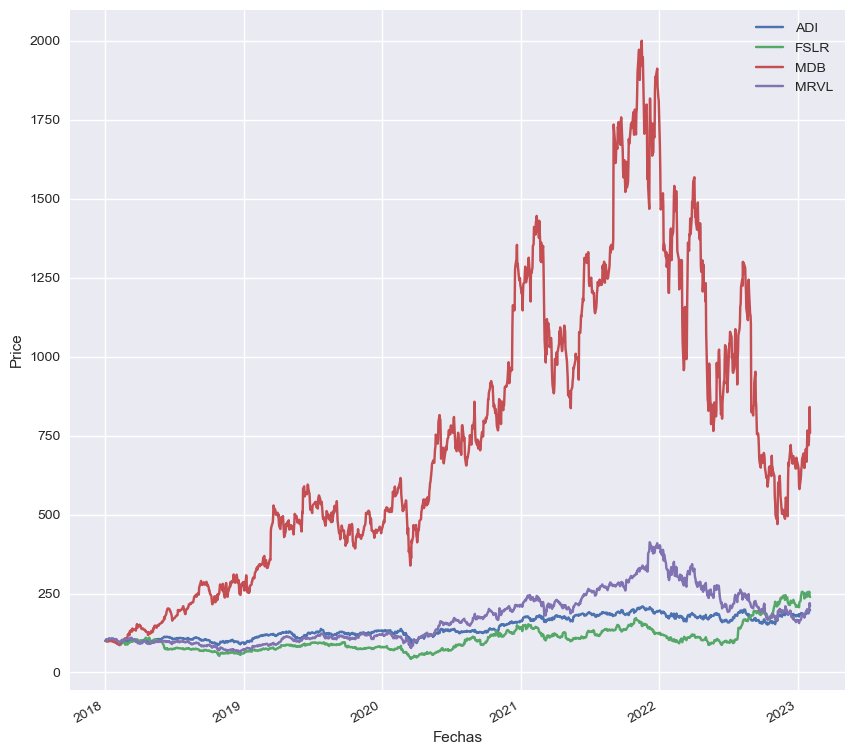

In [40]:
(assets/assets.iloc[0]*100).plot(figsize=(10,10))


plt.style.use('seaborn')
(assets/assets.iloc[0]*100).plot(figsize=(10,10),ylabel="Price",xlabel="Fechas")
plt.legend(assets)
plt.show()

In [41]:
rets = np.log(assets/assets.shift(1)).dropna()
rets

,ADI,FSLR,MDB,MRVL
Date,,,,
2018-01-03,0.012330,-0.008985,-0.003425,0.030608
2018-01-04,-0.001095,-0.009501,-0.003436,0.022463
2018-01-05,0.004044,0.000434,0.000000,-0.017669
2018-01-08,0.001744,0.006485,-0.008296,0.007364
2018-01-09,-0.002071,0.005729,-0.000694,-0.000864
...,...,...,...,...
2023-01-30,-0.011185,-0.048963,-0.062633,-0.052424
2023-01-31,0.014924,0.039158,0.017899,0.027251
2023-02-01,0.029422,0.014256,0.063134,0.066564


In [42]:
rets.std()

ADI     0.022128
FSLR    0.030022
MDB     0.042592
MRVL    0.030013
dtype: float64

In [43]:
rets.sum()

ADI     0.683464
FSLR    0.870475
MDB     2.026708
MRVL    0.741079
dtype: float64

In [44]:
rets.mean()*252

ADI     0.134452
FSLR    0.171241
MDB     0.398697
MRVL    0.145786
dtype: float64

In [45]:
rets.cov()*252

,ADI,FSLR,MDB,MRVL
ADI,0.123394,0.069912,0.102817,0.122566
FSLR,0.069912,0.227132,0.094673,0.099362
MDB,0.102817,0.094673,0.457139,0.157468
MRVL,0.122566,0.099362,0.157468,0.226990


In [46]:
num_stocks=len(symbols)

In [47]:
weights=np.random.rand(num_stocks)
weights/=np.sum(weights)

In [48]:
weights

array([0.04267636, 0.27235755, 0.41471106, 0.27025502])

In [49]:
# calculo del retorno

return_sample=np.sum(weights*rets.mean())*252
return_sample

0.2571199871297826

In [50]:
# calculo de la varianza

variance_sample=np.dot(weights.T,np.dot(rets.cov()*252,weights))

In [51]:
volatility_sample=np.sqrt(variance_sample)
volatility_sample

0.4378081205952849

In [52]:
def port_ret(weights):
    return np.sum(weights*rets.mean())*252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252,weights)))

prets = []
pvols =[]

for p in range(10000):
    weights=np.random.random(num_stocks)
    weights/=np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets=np.array(prets)
pvols=np.array(pvols)
 

In [53]:
# retornos_portfolio = []
# volatilidades_portfolio=[]

# for x in range(10000):
#     weights_sample=np.random.random(num_stocks)
#     weights_sample/=np.sum(weights_sample)
#     retornos_portfolio.append(np.sum(weights_sample*return_assets.mean())*252)
#     volatilidades_portfolio.append(np.sqrt(np.dot(weights_sample.T,np.dot(return_assets.cov()*252,weights_sample))))

In [54]:
retornos_portfolio=np.array(retornos_portfolio)
retornos_portfolio

NameError: name 'retornos_portfolio' is not defined

In [ ]:
volatilidades_portfolio=np.array(volatilidades_portfolio)
volatilidades_portfolio

In [ ]:
portfolios = pd.DataFrame({'Retorno':retornos_portfolio,'Volatilidad':volatilidades_portfolio})

In [ ]:
portfolios['sharpe']=portfolios['Retorno']/portfolios['Volatilidad']

In [ ]:
portfolios['sharpe'].max()

In [ ]:
portfolios[portfolios['sharpe']==0.7029231386476266]

In [ ]:
portfolios.plot(x="Volatilidad",y='Retorno',kind='scatter',figsize=(10,6))
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')




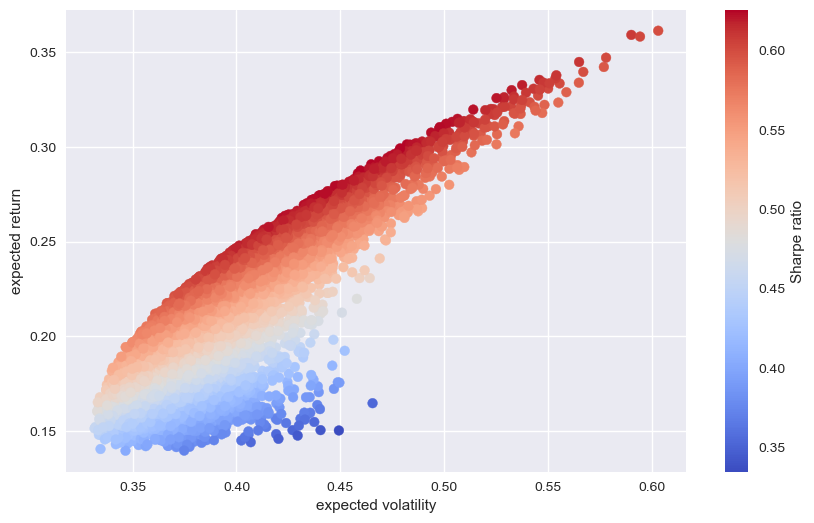

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c= prets/pvols, marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
#t is clear by inspection of Figure 13-13 that not all weight distributions perform well
#when measured in terms of mean and volatility. For example, for a fixed risk level of,
#say, 15%, there are multiple portfolios that all show different returns. As an investor,
#one is generally interested in the maximum return given a fixed risk level or the mini‐
#mum risk given a fixed return expectation. This set of portfolios then makes up the
#so-called efficient frontier. This is derived later in this section.

In [56]:
import scipy.optimize as sco
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [57]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [58]:
bnds = tuple((0, 1) for x in range(num_stocks))

In [59]:
eweights = np.array(num_stocks * [1. / num_stocks,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [60]:
min_func_sharpe(eweights)

-0.5571778121171601

In [61]:
opts = sco.minimize(min_func_sharpe, eweights,
method='SLSQP', bounds=bnds,
constraints=cons)

In [62]:
opts

     fun: -0.6261765026532444
     jac: array([ 2.92479992e-04,  7.44909048e-05, -1.44854188e-04,  8.64664316e-02])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.19812293, 0.26539173, 0.53648534, 0.        ])

In [63]:
opts['x'].round(3) # optimal portfolio return

array([0.198, 0.265, 0.536, 0.   ])

In [64]:
port_ret(opts['x']).round(3) # resulting portfolio return

0.286

In [65]:
port_vol(opts['x']).round(3) # resulting portfolio volatility

0.457

In [66]:
port_ret(opts['x'])/port_vol(opts['x']) # maximum sharpe

0.6261765026532444

In [67]:
optv = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

In [68]:
optv

     fun: 0.3310488912129595
     jac: array([0.33099142, 0.33116297, 0.33157632, 0.35547878])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([7.26021903e-01, 2.48645128e-01, 2.53329693e-02, 1.73472348e-18])

In [69]:
optv['x'].round(3)

array([0.726, 0.249, 0.025, 0.   ])

In [70]:
port_vol(optv['x'].round(3))

0.33104884401352186

In [71]:
port_ret(optv['x'].round(3))

0.15021849761610523

In [72]:
port_ret(optv['x']) / port_vol(optv['x'])

0.4539916355232819

In [73]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [74]:
bnds = tuple((0, 1) for x in weights)

In [75]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2.85 s, sys: 39 ms, total: 2.89 s
Wall time: 2.92 s


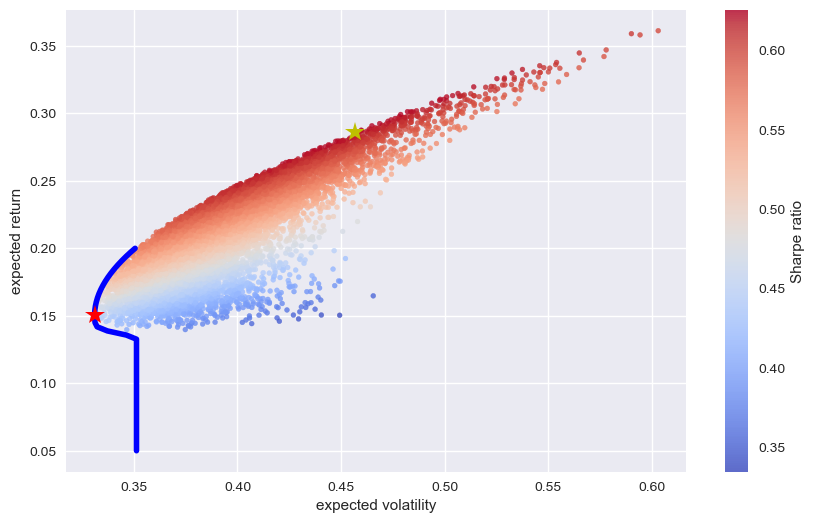

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## Markowitz efficient

In [ ]:

rets

In [ ]:
plt.figure(figsize=(12.2,4.5)) 
for i in rets.columns.values:
    plt.hist( rets[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(return_assets.columns.values)
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#### CAPM 

# Rentabilidad esperada = Rentab libre de riesgo + beta (Rentabilidad esperada mercado-Rentabilidad libre de riesgo)


# Rentabilidad libre de riesgo = Bono USA a un año 4,66&
# Rentabilidad mercado = SP500 ^GSPC

In [ ]:
benchmark =pdr.get_data_yahoo('^GSPC',start)

In [ ]:
benchmark=benchmark[['Close']]

In [ ]:
rets_bench=np.log(benchmark/benchmark.shift(1)).dropna()

In [ ]:
rets_bench
rets_bench.sum()

In [ ]:
retornos_esperados=expected_returns.capm_return(rets,market_prices=rets_bench,returns_data=True,risk_free_rate=4.5/100,frequency=252)

In [ ]:
retornos_esperados


In [ ]:
df_cov = rets.cov()*252
df_cov

In [ ]:
ef = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

In [ ]:
ef1 = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef1.efficient_return(0.06,market_neutral=False) 
cleaned_weights1 = ef1.clean_weights() 
print(cleaned_weights1) 
ef1.portfolio_performance(verbose=True)


In [ ]:
ef2 = EfficientFrontier(retornos_esperados, df_cov, weight_bounds=(0,1))
weights = ef2.portfolio_performance(verbose=False, risk_free_rate=0.046) 
cleaned_weights2 = ef2.clean_weights() 
print(cleaned_weights2) 


In [ ]:
assets['ep']=assets['ADI']*0.168+assets['MRVL']*0.257+assets['FSLR']*0.575
#return_assets['ep']=(return_assets['CLX']*0.3145+return_assets['CPB']*0.27972+return_assets['CPT']*0.2141+return_assets['RCL']*0.01574+return_assets['USB']*0.17584)

In [ ]:
rets

In [ ]:
#return_ep = return_assets.loc[:,return_assets.columns=='ep']

In [ ]:
S0=assets['ADI'].tolist()[0]


In [ ]:
S0

In [ ]:
mu = rets['ep'].mean()
var = rets['ep'].var()
drift=mu-(0.5*var)
stdev=rets['ep'].std()
n_simulations=3
days=np.arange(252)

In [ ]:
mu

In [ ]:
var

In [ ]:
epsilon=norm.ppf(np.random.rand(len(days),n_simulations))

In [ ]:
return_model = drift + stdev * epsilon

In [ ]:
S=np.zeros_like(return_model)
S

In [ ]:
for t in range(1,len(days)):
    S[t]=S[t-1]*np.exp(return_model[t])

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(S)
plt.title('Price of Apple stock 1 year from now')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()